In [82]:
# Boston Housing price regression
# - DNN, regressor
#   * 2 Hidden Layers (13, 6), activation = sigmoid
#   * optimizer : RMSprop, loss = MeanAbsoluteError

In [83]:
import tensorflow as tf
from tensorflow import keras
import numpy as np               
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.boston_housing import load_data
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

print(X_train.shape)

(404, 13)


In [84]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(13,)),
  keras.layers.Dense(13, activation='sigmoid'),
  keras.layers.Dense(6, activation='sigmoid'),
  keras.layers.Dense(1) # regression의 경우 target 값 1
])

model.compile(loss = keras.losses.MeanSquaredError(reduction="auto"),
              optimizer = keras.optimizers.RMSprop(learning_rate=0.01),
              metrics = ['accuracy']  # regression의 경우 accuracy가 무조건 0이므로 의미가 없다
)

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 13)                182       
                                                                 
 dense_75 (Dense)            (None, 6)                 84        
                                                                 
 dense_76 (Dense)            (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
13/13 [==============================] - 0s 997us/step - loss: 557.8809 - accuracy: 0.0000e+00
Epoch 2/150
13/13 [==============================] - 0s 831us/step - loss: 512.8191 - accuracy: 0.0000e+00
Epoch 3/150
13/13 [==============================] - 0s 748us/step - loss: 478.0217 - accuracy: 0.0000e+00
Epoch 4/150
13/13 [==============================] - 0s 831us/step - loss: 448.5933 - accuracy: 0.0000e+00
Epoch 5/150
13/13 [==============================] - 0s 831us/step - loss: 422.5233 - accuracy: 0.0000e+00
Epoch 6/150
13/13 [==============================] - 0s 914us/step - loss: 397.5469 - accuracy: 0.0000e+00
Epoch 7/150
13/13 [==============================] - 0s 748us/step - loss: 371.8702 - accuracy: 0.0000e+00
Epoch 8/150
13/13 [==============================] - 0s 748us/step - loss: 343.0585 - accuracy: 0.0000e+00
Epoch 9/150
13/13 [==============================] - 0s 748us/step - loss: 315.3714 - accuracy: 0.0000e+00
Epoch 10/150
13/13 [=================

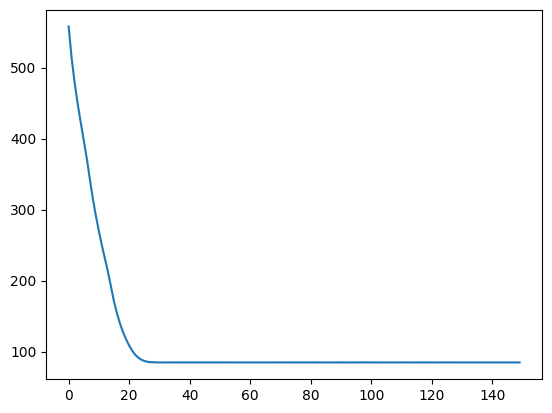

In [85]:
h = model.fit(X_train, y_train, epochs=150)

_, axe = plt.subplots()
axe.plot(h.history['loss'])

In [86]:
# 분류가 아닌 regression! 값 1개를 예측하는 모델

(X_train, y_train), (X_test, y_test) = load_data()

model = keras.Sequential([
  keras.layers.Dense(13, input_shape=(13,), activation='sigmoid'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(6),
  keras.layers.Activation('sigmoid'),
  keras.layers.Dense(1)
])

model.summary()

# model.compile(loss='mae', optimizer='rmsprop')
model.compile(loss=keras.losses.MeanAbsoluteError(), optimizer=keras.optimizers.RMSprop(learning_rate=0.01))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 13)                182       
                                                                 
 dropout_6 (Dropout)         (None, 13)                0         
                                                                 
 dense_78 (Dense)            (None, 6)                 84        
                                                                 
 activation_15 (Activation)  (None, 6)                 0         
                                                                 
 dense_79 (Dense)            (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
13/13 [==============================] - 0s 914us/step - loss: 22.1453
Epoch 2/200
13/13 [==============================] - 0s 831us/step - loss: 21.2403
Epoch 3/200
13/13 [==============================] - 0s 914us/step - loss: 20.5701
Epoch 4/200
13/13 [==============================] - 0s 914us/step - loss: 20.0425
Epoch 5/200
13/13 [==============================] - 0s 831us/step - loss: 19.4966
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 18.8423
Epoch 7/200
13/13 [==============================] - 0s 748us/step - loss: 18.0700
Epoch 8/200
13/13 [==============================] - 0s 914us/step - loss: 17.2422
Epoch 9/200
13/13 [==============================] - 0s 831us/step - loss: 16.4768
Epoch 10/200
13/13 [==============================] - 0s 748us/step - loss: 15.7574
Epoch 11/200
13/13 [==============================] - 0s 997us/step - loss: 15.0117
Epoch 12/200
13/13 [==============================] - 0s 1ms/step - loss: 14.0702
Epoch

In [88]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 833us/step - loss: 4.7676
4.767602443695068
4/4 [==============================] - 0s 988us/step - loss: 4.9478
4.94775390625
